In [163]:
import numpy as np
import matplotlib.pyplot as plt

In [164]:
# Sample data
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

We are trying to build an nth degree polynomial a.k.a

f(x) = a_0 + a_1 x + a_2 x^2 + ... + a_n x^n


In [165]:
n = 5  # degree of polynomial you want to fit
X = np.zeros((len(x), n+1))
for j in range(n+1):
    X[:, j] = x**j

The coefficients can be found via the equation

\alpha = (X**T @ X)**-1 @ X**T * y

In [166]:
# compute coefficients via normal equations
XT = X.T
alpha = np.linalg.inv(XT @ X) @ XT @ y

In [167]:
def poly_eval(a, x):
    y_fit = np.zeros_like(x)
    for j in range(len(a)):
        y_fit += a[j] * x**j
    return y_fit

# fine grid for plotting
x_fit = np.linspace(0, 2*np.pi, 400)
y_fit = poly_eval(alpha, x_fit)

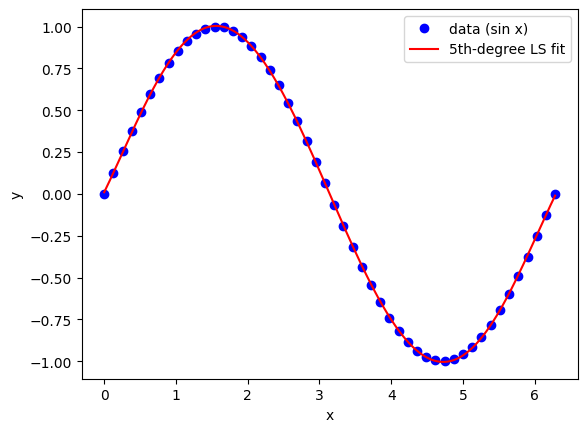

In [168]:
plt.figure()
plt.plot(x, y, 'bo', label='data (sin x)')
plt.plot(x_fit, y_fit, 'r-', label=f'{n}th-degree LS fit')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The residual can be found by the equation

r_i = y + f(x_i)

as well as the sum

S = \Sigma (r_i)**2

In [169]:
r = y - poly_eval(alpha, x)
S = np.sum(r**2)
print("Sum of squared residuals =", S)

Sum of squared residuals = 0.001137963974881826


In [170]:
sigma = 0.05 * np.ones_like(y)
X2 = np.sum((r/sigma)**2)
nu = len(y) - (n+1)
X2_red = X2 / nu
print("Reduced X² =", X2_red)

Reduced X² = 0.010345127044380235


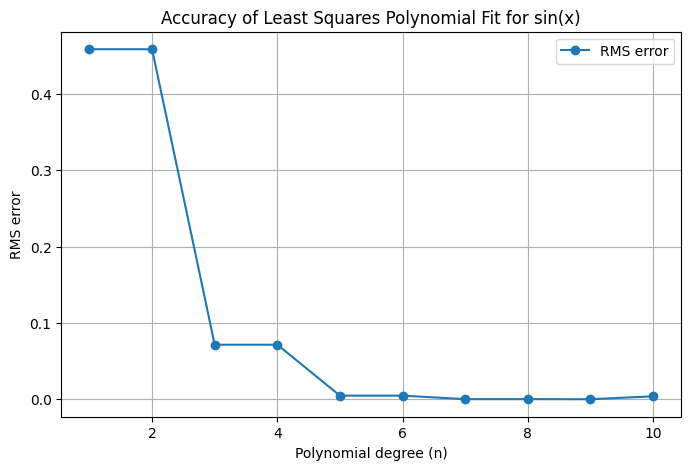

In [171]:
degrees = range(1, 11)
errors = []

for n in degrees:
    X = np.zeros((len(x), n+1))
    for j in range(n+1):
        X[:, j] = x**j
    
    alpha = np.linalg.inv(X.T @ X) @ X.T @ y

    y_fit = poly_eval(alpha, x)
    err = np.sqrt(np.mean((y - y_fit)**2))
    errors.append(err)

# Plot accuracy vs degree
plt.figure(figsize=(8, 5))
plt.plot(degrees, errors, 'o-', label='RMS error')
plt.xlabel('Polynomial degree (n)')
plt.ylabel('RMS error')
plt.title('Accuracy of Least Squares Polynomial Fit for sin(x)')
plt.grid(True)
plt.legend()
plt.show()